In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
pokGo = pd.read_csv('300k.csv')
pokGo.head(5)

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133


In [99]:
pokGo.columns

Index(['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', '_id',
       'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m',
       'cellId_1460m',
       ...
       'cooc_143', 'cooc_144', 'cooc_145', 'cooc_146', 'cooc_147', 'cooc_148',
       'cooc_149', 'cooc_150', 'cooc_151', 'class'],
      dtype='object', length=208)

# Pokemon Go spawns on August 2016

In [100]:
pokGo_mini = pokGo[['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', 'appearedTimeOfDay', 'appearedHour',
              'appearedMinute', 'appearedDayOfWeek', 'appearedDay',
                    'closeToWater', 'city', 'continent', 'weather', 'temperature', 'windSpeed', 'windBearing',
                    'pressure', 'population_density']]
pokGo_mini.head(5)

,pokemonId,latitude,longitude,appearedLocalTime,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,population_density
0,16,20.525745,-97.460829,2016-09-08T03:57:45,night,5,57,dummy_day,8,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341
1,133,20.523695,-97.461167,2016-09-08T03:57:37,night,5,57,dummy_day,8,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341
2,16,38.903590,-77.199780,2016-09-08T03:57:25,night,5,57,dummy_day,8,False,New_York,America,Clear,24.2,4.29,218,1015.29,761.8856
3,13,47.665903,-122.312561,2016-09-08T03:56:22,night,5,56,dummy_day,8,True,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626
4,133,47.666454,-122.311628,2016-09-08T03:56:08,night,5,56,dummy_day,8,True,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626


In [101]:
pokGo_mini['appearedDayOfWeek'].replace('dummy_day', 'Monday', inplace=True)
pokGo_mini['appearedDay'].replace(8, 1, inplace=True)
pokGo_mini.head(5)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,pokemonId,latitude,longitude,appearedLocalTime,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,population_density
0,16,20.525745,-97.460829,2016-09-08T03:57:45,night,5,57,Monday,1,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341
1,133,20.523695,-97.461167,2016-09-08T03:57:37,night,5,57,Monday,1,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341
2,16,38.903590,-77.199780,2016-09-08T03:57:25,night,5,57,Monday,1,False,New_York,America,Clear,24.2,4.29,218,1015.29,761.8856
3,13,47.665903,-122.312561,2016-09-08T03:56:22,night,5,56,Monday,1,True,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626
4,133,47.666454,-122.311628,2016-09-08T03:56:08,night,5,56,Monday,1,True,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626


In [102]:
pokemon = ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle',
           'Blastoise', 'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto',
           'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew',
           'Sandslash', 'Nidoran_F', 'Nidorina', 'Nidoqueen', 'Nidoran_M', 'Nidorino', 'Nidoking', 'Clefairy',
           'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom',
           'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian',
           'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath',
           'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel',
           'Tentacool', 'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash', 'Slowpoke', 'Slowbro',
           'Magnemite', 'Magneton', 'Farfetchd', 'Doduo', 'Dodrio', 'Seel', 'Dewgong', 'Grimer', 'Muk', 'Shellder',
           'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb',
           'Electrode', 'Exeggcute', 'Exeggutor', 'Cubone', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung',
           'Koffing', 'Weezing', 'Rhyhorn', 'Rhydon', 'Chansey', 'Tangela', 'Kangaskhan', 'Horsea', 'Seadra',
           'Goldeen', 'Seaking', 'Staryu', 'Starmie', 'Mr. Mime', 'Scyther', 'Jynx', 'Electabuzz', 'Magmar', 'Pinsir',
           'Tauros', 'Magikarp', 'Gyarados', 'Lapras', 'Ditto', 'Eevee', 'Vaporeon', 'Jolteon', 'Flareon', 'Porygon',
           'Omanyte', 'Omastar', 'Kabuto', 'Kabutops', 'Aerodactyl', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres',
           'Dratini', 'Dragonair', 'Dragonite', 'Mewtwo', 'Mew']
name_id_map = {}
for i in range(len(pokemon)):
    name_id_map[i+1] = pokemon[i]

In [103]:
freq = pokGo_mini.groupby('pokemonId').size().sort_values(ascending=False)
freq.rename(name_id_map, inplace=True)

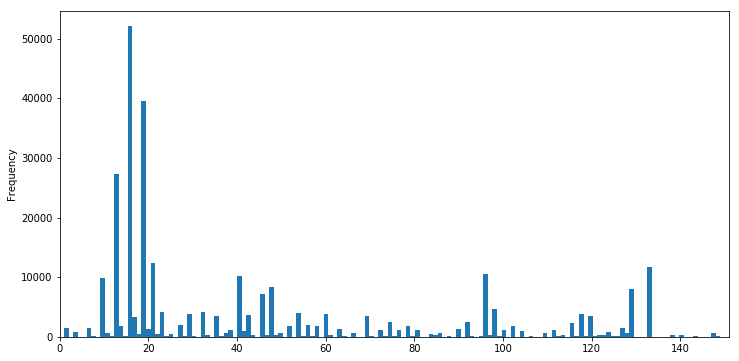

In [104]:
h = pokGo_mini['pokemonId'].plot.hist(bins=len(freq), figsize=(12, 6), xlim=(0, 151))

### Pokemon appearances by continent and city

In [150]:
pokId = 113
print('Appearances for {}'.format(name_id_map[pokId]))
print(pokGo_mini[pokGo_mini['pokemonId']==pokId].groupby(['continent', 'city'], as_index=False).size())

Appearances for Chansey
continent  city       
America    Denver          2
           Los_Angeles    13
           Monterrey       1
           New_York        2
           Phoenix         1
Europe     Berlin          1
           Prague          1
           Zagreb          1
dtype: int64


## Pokemon appearances in Rome between September 2nd, 2016 and September 8th, 2016

In [247]:
pokGoRome = pokGo_mini[pokGo_mini['city']=='Rome'].reset_index(drop=True)
len(pokGoRome)

15883

In [248]:
pokGoRome.head(5)

,pokemonId,latitude,longitude,appearedLocalTime,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,population_density
0,90,40.927687,9.497531,2016-09-08T02:38:54,night,4,38,Monday,1,True,Rome,Europe,MostlyCloudy,22.0,6.16,329,1012.28,149.01443
1,85,40.929925,9.500745,2016-09-08T02:37:59,night,4,37,Monday,1,True,Rome,Europe,MostlyCloudy,22.0,6.16,329,1012.28,0.00000
2,133,40.927742,9.499702,2016-09-08T02:34:33,night,4,34,Monday,1,True,Rome,Europe,MostlyCloudy,22.0,6.16,329,1012.28,149.01443
3,120,40.930765,9.499094,2016-09-08T02:33:53,night,4,33,Monday,1,True,Rome,Europe,MostlyCloudy,22.0,6.16,329,1012.28,149.01443
4,129,40.928759,9.499702,2016-09-08T02:33:35,night,4,33,Monday,1,True,Rome,Europe,MostlyCloudy,22.0,6.16,329,1012.28,149.01443


In [249]:
dates = pokGoRome.appearedLocalTime.sort_values()
print('Dates range between {} and {}'.format(dates[len(dates)-1], dates[0]))

Dates range between 2016-09-02T21:50:41 and 2016-09-08T02:38:54


In [250]:
pokGoRome.dtypes.reset_index()

,index,0
0,pokemonId,int64
1,latitude,float64
2,longitude,float64
3,appearedLocalTime,object
4,appearedTimeOfDay,object
5,appearedHour,int64
6,appearedMinute,int64
7,appearedDayOfWeek,object
8,appearedDay,int64
9,closeToWater,bool


In [257]:
#pokGoRome = pokGoRome[(pokGoRome['latitude']>=41.79) & (pokGoRome['latitude']<=42.00)]
#pokGoRome = pokGoRome[(pokGoRome['longitude']>=12.36) & (pokGoRome['longitude']<=12.62)]
print(len(pokGoRome))
#pokGoRome = pokGoRome.reset_index(drop=True)

15883


In [252]:
pokGoRome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15883 entries, 0 to 15882
Data columns (total 18 columns):
pokemonId             15883 non-null int64
latitude              15883 non-null float64
longitude             15883 non-null float64
appearedLocalTime     15883 non-null object
appearedTimeOfDay     15883 non-null object
appearedHour          15883 non-null int64
appearedMinute        15883 non-null int64
appearedDayOfWeek     15883 non-null object
appearedDay           15883 non-null int64
closeToWater          15883 non-null bool
city                  15883 non-null object
continent             15883 non-null object
weather               15883 non-null object
temperature           15883 non-null float64
windSpeed             15883 non-null float64
windBearing           15883 non-null int64
pressure              15883 non-null float64
population_density    15883 non-null float64
dtypes: bool(1), float64(6), int64(5), object(6)
memory usage: 2.1+ MB


In [253]:
pokGoRome.describe()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,appearedDay,temperature,windSpeed,windBearing,pressure,population_density
count,15883.000000,15883.000000,15883.000000,15883.000000,15883.000000,15883.000000,15883.000000,15883.000000,15883.000000,15883.000000,15883.000000
mean,47.157464,44.020465,10.304937,12.410313,29.612794,4.747718,24.244236,5.901626,167.589498,1015.538728,1098.873827
std,42.227016,5.871593,12.261508,6.033816,17.419368,1.334689,3.951949,5.413411,102.390997,2.166814,1694.993965
min,1.000000,-23.675473,-96.885996,0.000000,0.000000,1.000000,10.000000,0.270000,0.000000,1008.400000,0.000000
25%,16.000000,44.418016,9.945659,9.000000,14.000000,4.000000,21.800000,2.820000,72.000000,1013.270000,256.713560
50%,20.000000,44.495919,11.350117,13.000000,29.000000,5.000000,24.800000,5.380000,170.000000,1015.820000,511.283080
75%,74.000000,45.475830,11.913448,16.000000,45.000000,6.000000,26.700000,7.100000,249.500000,1017.300000,1055.898200
max,148.000000,60.500271,139.659598,23.000000,59.000000,7.000000,33.400000,56.130000,359.000000,1023.100000,10000.000000


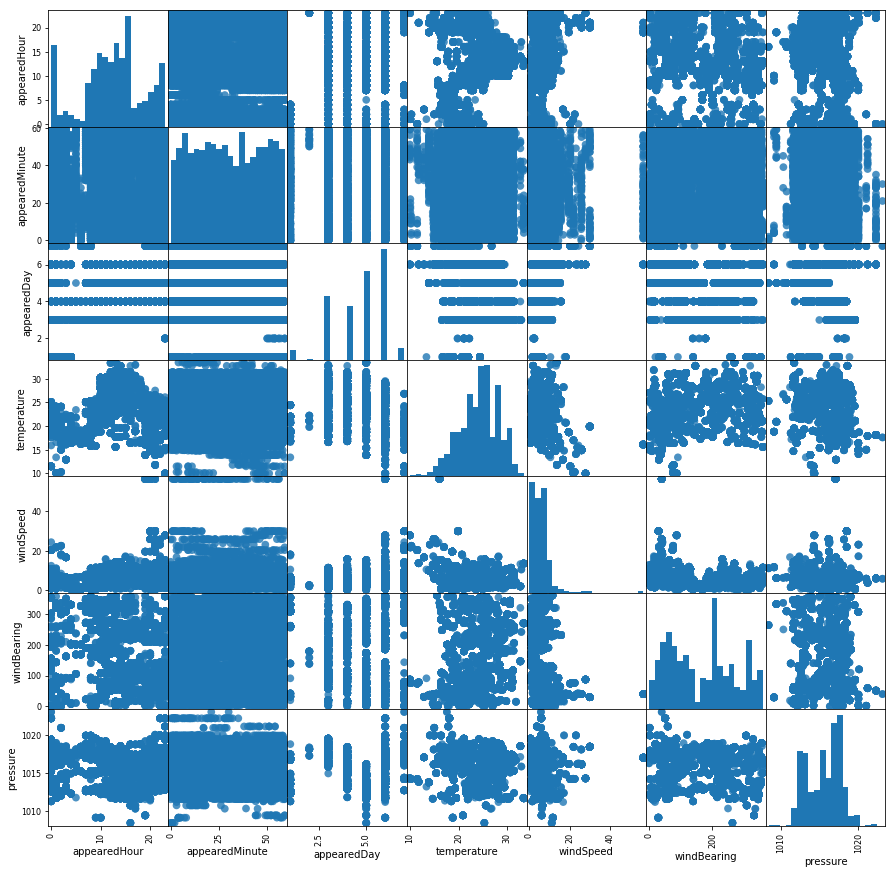

In [254]:
a = pd.plotting.scatter_matrix(pokGoRome[['appearedHour', 'appearedMinute', 'appearedDay',
                                     'temperature', 'windSpeed', 'windBearing', 'pressure']],
                           figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

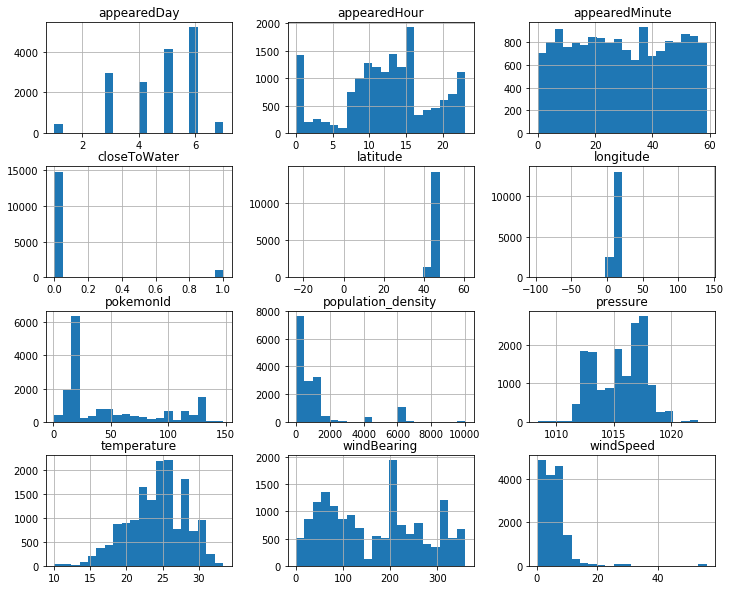

In [255]:
b = pokGoRome.hist(bins=20, figsize=(12,10))

In [258]:
X = pokGoRome[['appearedTimeOfDay', 'appearedDay', 'appearedHour', 'appearedMinute', 'weather', 'temperature',
               'windSpeed', 'windBearing', 'pressure']]
y = pokGoRome['pokemonId']

In [259]:
dayTm = X.appearedTimeOfDay.unique()
dayTimeDict = dict(zip(dayTm, range(len(dayTm))))
wthr = X.weather.unique()
weatherDict = dict(zip(wthr, range(len(wthr))))

In [260]:
X.replace({'appearedTimeOfDay': dayTimeDict}, inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [261]:
X.replace({'weather': weatherDict}, inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [262]:
X.head(5)

,appearedTimeOfDay,appearedDay,appearedHour,appearedMinute,weather,temperature,windSpeed,windBearing,pressure
0,0,1,4,38,0,22.0,6.16,329,1012.28
1,0,1,4,37,0,22.0,6.16,329,1012.28
2,0,1,4,34,0,22.0,6.16,329,1012.28
3,0,1,4,33,0,22.0,6.16,329,1012.28
4,0,1,4,33,0,22.0,6.16,329,1012.28


In [263]:
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (11912, 9)
y_train shape: (11912,)
X_test shape: (3971, 9)
y_test shape: (3971,)


In [265]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [234]:
log_reg = LogisticRegression(multi_class='multinomial', penalty='l2')
grid_values = {'C':[0.01, 0.1, 1, 10, 100], 'solver':['newton-cg', 'lbfgs']}
grid = GridSearchCV(log_reg, param_grid=grid_values, scoring='accuracy', cv=3)
grid.fit(X_scaled, y_train)
print('Grid best parameter (accuracy): {}'.format(grid.best_params_))
print('Grid best score (accuracy): {}'.format(grid.best_score_))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Grid best parameter (accuracy): {'C': 1, 'solver': 'newton-cg'}
Grid best score (accuracy): 0.27450980392156865


In [235]:
grid = grid.best_estimator_
X_test_scaled = scaler.transform(X_test)
y_pred = grid.predict(X_test_scaled)
acc = grid.score(X_test_scaled, y_test)
rec = recall_score(y_test, y_pred, average='micro')
prec = precision_score(y_test, y_pred, average='micro')
conf_mtx = confusion_matrix(y_test, y_pred)
print('Accuracy: {}'.format(acc))
print('Recall: {}'.format(rec))
print('Precision: {}'.format(prec))
print(classification_report(y_test, y_pred))
print(conf_mtx)

Accuracy: 0.0
Recall: 0.0
Precision: 0.0
             precision    recall  f1-score   support

         13       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         5
         19       0.00      0.00      0.00         1
         37       0.00      0.00      0.00         2
         41       0.00      0.00      0.00         1
         46       0.00      0.00      0.00         1
         48       0.00      0.00      0.00         2
         60       0.00      0.00      0.00         0
         98       0.00      0.00      0.00         2
        102       0.00      0.00      0.00         1
        129       0.00      0.00      0.00         2
        133       0.00      0.00      0.00         0

avg / total       0.00      0.00      0.00        17

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [238]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = y_train
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(multi_class='multinomial', penalty='l2',
                                                                          C=1, solver='newton-cg'),
                                                        X_scaled, y_scaled, train_sizes=np.arange(5, 28, 5),
                                                        cv=5, shuffle=True)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Text(0,0.5,'Score')

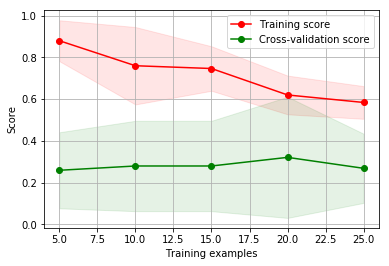

In [239]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')

In [266]:
grid_values = {'max_depth':[1, 2, 3, 5, 10, 20]}
rnd_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, n_jobs=-1, random_state=0)
grid = GridSearchCV(rnd_clf, param_grid=grid_values, scoring='f1_micro', cv=3)
grid.fit(X_train, y_train)
print('Grid best parameter (F1): {}'.format(grid.best_params_))
print('Grid best score (F1): {}'.format(grid.best_score_))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Grid best parameter (F1): {'max_depth': 5}
Grid best score (F1): 0.18561114842175958


In [267]:
grid = grid.best_estimator_
print(grid)
# transform and predict new values
y_pred = grid.predict(X_test)
# metrics
print('MSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Accuracy: {}'.format(grid.score(X_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, y_pred, average='micro')))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
MSE: 52.25738511124838
Accuracy: 0.18962477965248048
Recall: 0.18962477965248048
Precision: 0.18962477965248048
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        52
          2       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        23
          7       0.00      0.00      0.00        23
         10       0.00      0.00      0.00       152
         11       0.00      0.00      0.00         7
         12       0.00      0.00      0.00         1
     

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [268]:
grid.feature_importances_

array([0.03440716, 0.08872012, 0.08998397, 0.13664263, 0.0464062 ,
       0.14873114, 0.14764714, 0.16467022, 0.14279141])

In [271]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = y_train
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
                                                        X_scaled, y_scaled, train_sizes=np.arange(10, 9450, 100),
                                                        cv=5, shuffle=True)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Text(0,0.5,'Score')

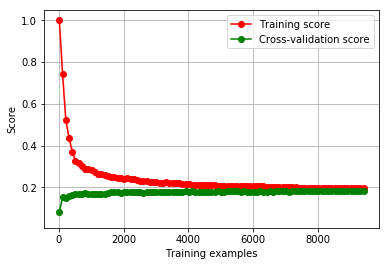

In [272]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')